## Time Series Data Analysis and Plotting

Time series analysis - investigating climate data using Python and Pandas. Time series data are repeated measurements of the same phenomenon, taken sequentially over time.

`import pandas as pd`

`from matplotlib import pyplot as plt`

`from zipfile import ZipFile`

`%matplotlib inline`

In [9]:
import pandas as pd
from matplotlib import pyplot as plt
from zipfile import ZipFile
%matplotlib inline

## Getting the Data

Download the following 2 datasets:

1. Estimate of global surface temperature change (NASA)

These data represent temperature anomalies (differences from the mean/expected value) per month and per season (DJF=Dec-Feb, MAM=Mar-May, etc).

`! curl -o ./data/GISTEMP.csv https://data.giss.nasa.gov/gistemp/tabledata_v3/GLB.Ts+dSST.csv`

In [10]:
! curl -o ./data/GISTEMP.csv https://data.giss.nasa.gov/gistemp/tabledata_v3/GLB.Ts+dSST.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 12274  100 12274    0     0  26108      0 --:--:-- --:--:-- --:--:-- 26059


2. Estimate of CO2 emissions, in metric tons per capita (World Bank)

These data give us the average CO₂ emission (in metric tons) per person. The dataset is divided up by countries and other categories such as ‘World’ or ‘Upper middle income.’

Download and unzip the files.

`! curl -o ./data/CO2.zip http://api.worldbank.org/v2/en/indicator/EN.ATM.CO2E.PC?downloadformat=csv`

`with ZipFile("./data/CO2.zip", "r") as zip:
    zip.extractall("./data/")`

In [11]:
! curl -o ./data/CO2.zip http://api.worldbank.org/v2/en/indicator/EN.ATM.CO2E.PC?downloadformat=csv
    
with ZipFile("../data/CO2.zip", "r") as zip:
   zip.extractall("../data/")

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  117k  100  117k    0     0   177k      0 --:--:-- --:--:-- --:--:--  177k


## Create DataFrames

Read in the raw temperature and CO₂ emissions datasets. Use `skiprows` to structure the data in the DataFrame.

`raw_t = pd.read_csv("./data/GISTEMP.csv", skiprows=1)`

`raw_e = pd.read_csv("./data/API_EN.ATM.CO2E.PC_DS2_en_csv_v2_713061.csv", skiprows=3)`

In [12]:
raw_t = pd.read_csv("../data/GISTEMP.csv", skiprows=1)
raw_t.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.29,-0.18,-0.11,-0.20,-0.12,-0.23,-0.21,-.09,-.16,-.23,-.20,-.23,-.19,***,***,-0.14,-.18,-.20
1,1881,-0.16,-0.17,0.04,0.04,0.02,-0.20,-0.07,-.03,-.14,-.21,-.22,-.11,-.10,-.11,-.18,0.03,-.10,-.19
2,1882,0.14,0.15,0.03,-0.19,-0.16,-0.26,-0.21,-.06,-.10,-.25,-.16,-.25,-.11,-.10,.06,-0.10,-.17,-.17
3,1883,-0.32,-0.39,-0.13,-0.17,-0.20,-0.13,-0.08,-.15,-.21,-.14,-.22,-.16,-.19,-.20,-.32,-0.17,-.12,-.19
4,1884,-0.16,-0.08,-0.37,-0.43,-0.37,-0.41,-0.35,-.26,-.27,-.24,-.30,-.29,-.29,-.28,-.13,-0.39,-.34,-.27


In [13]:
raw_e = pd.read_csv("../data/API_EN.ATM.CO2E.PC_DS2_en_csv_v2_713061.csv", skiprows=3)
raw_e.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,24.507516,13.157722,8.353561,8.410064,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.046057,0.053589,0.073721,0.074161,0.086174,0.101285,...,0.406424,0.345149,0.310341,0.293946,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.100835,0.082204,0.210531,0.202737,0.213560,0.205891,...,1.252681,1.330219,1.253776,1.290307,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1.258195,1.374186,1.439956,1.181681,1.111742,1.166099,...,1.803715,1.692908,1.749211,1.978763,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,5.867410,5.916884,5.901775,5.832906,NaN,NaN,NaN,NaN,NaN,NaN


## Data Wrangling

Transforming data from one format to another to make them usable

### Wrangling Temperature Data

* Create a DateTime index

* Handling missing values

* Resampling to a different frequency


### Creating a DateTime index

For the temperature data, create an empty dataframe with a DateTime index of monthly frequency - then use the raw data to populate the new dataframe.

Use the `date_range` function to create a date range index. The index will range from January 1880 to June 2019.

`date_rng = pd.date_range(start="1/1/1880", end="6/1/2019", freq="M")`

Create an empty dataframe with one column named `date` containing the values from the date index

`t = pd.DataFrame(date_rng, columns=["date"])`

Create a column for the anomoly values

`t["Avg_Anomaly_deg_C"] = None`

Set the index to the date column (DateTime index)

`t.set_index("date", inplace=True)`

In [14]:
date_rng = pd.date_range(start="1/1/1880", end="6/1/2019", freq="M")
t = pd.DataFrame(date_rng, columns=["date"])
t["Avg_Anomaly_deg_C"] = None
t.set_index("date", inplace=True)
t

,Avg_Anomaly_deg_C
date,
1880-01-31,None
1880-02-29,None
1880-03-31,None
1880-04-30,None
1880-05-31,None
...,...
2019-01-31,None
2019-02-28,None
2019-03-31,None


Extract the raw temperature data from the year and month columns.

`raw_t = raw_t.iloc[:,:13]` *Select all rows of columns 0 through 12*

In [15]:
raw_t = raw_t.iloc[:,:13]
raw_t

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1880,-0.29,-0.18,-0.11,-0.20,-0.12,-0.23,-0.21,-.09,-.16,-.23,-.20,-.23
1,1881,-0.16,-0.17,0.04,0.04,0.02,-0.20,-0.07,-.03,-.14,-.21,-.22,-.11
2,1882,0.14,0.15,0.03,-0.19,-0.16,-0.26,-0.21,-.06,-.10,-.25,-.16,-.25
3,1883,-0.32,-0.39,-0.13,-0.17,-0.20,-0.13,-0.08,-.15,-.21,-.14,-.22,-.16
4,1884,-0.16,-0.08,-0.37,-0.43,-0.37,-0.41,-0.35,-.26,-.27,-.24,-.30,-.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,2015,0.81,0.87,0.90,0.75,0.75,0.79,0.71,.79,.82,1.07,1.03,1.10
136,2016,1.15,1.35,1.31,1.07,0.91,0.77,0.82,1.00,.88,.90,.91,.83
137,2017,0.98,1.13,1.13,0.92,0.89,0.70,0.82,.87,.76,.88,.86,.89
138,2018,0.77,0.85,0.91,0.87,0.81,0.74,0.78,.73,.76,.99,.78,.89


### Apply 

Use the `apply` function to step through the rows of the raw data (`axis=1` for rows, `axis=0` for columns) and apply them to the new dataframe.

Import the following libraries

`from datetime import datetime` *useful for parsing dates and times*

`import calendar` *used to get the last day of each month*

In [16]:
from datetime import datetime
import calendar

Define a function to populate the dataframe with row values from the raw temperature data:

`def populate_anom():`

&nbsp;&nbsp;&nbsp;&nbsp;`year = row["Year"]`

&nbsp;&nbsp;&nbsp;&nbsp;`monthly_anomolies = row.iloc[1:]`

&nbsp;&nbsp;&nbsp;&nbsp;`months = monthly_anomolies.index`

&nbsp;&nbsp;&nbsp;&nbsp;`for month in monthly_anomolies.index:`

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`last_day = calendar.monthrange(year,datetime.strptime(month, '%b').month)[1]`

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`date_index = datetime.strptime(f'{year} {month} {last_day}', '%Y %b %d')`

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`t.loc[date_index] = monthly_anomolies[month]`

`strptime` creates a  date time object from a string

`strftime` creates a string from a date time object

For more on strptime and strftime see https://docs.python.org/3/library/datetime.html#strftime-strptime-behavior

In [17]:
def populate_anom(row):
    year = row["Year"]
    monthly_anomolies = row.iloc[1:]
    months = monthly_anomolies.index
    for month in monthly_anomolies.index:
        last_day = calendar.monthrange(year,datetime.strptime(month, "%b").month)[1]
        date_index = datetime.strptime(f"{year} {month} {last_day}", "%Y %b %d")
        t.loc[date_index] = monthly_anomolies[month]


        
### Lambda
 
 A lambda function is a small anonymous function that can take any number of arguments, but can only have one expression.
 
Example:
 
`x = lambda a : a + 10`

`(x(5))`

In [18]:
x = lambda a : a + 10
(x(2))

12

Using lambda, apply the `populate_df()` function to each row of raw data (axis=1)

`_ = raw_t.apply(lambda row: populate_anom(row), axis=1)`

In [19]:
def populate_anom(row):
    year = row["Year"]
    monthly_anomolies = row.iloc[1:]
    months = monthly_anomolies.index
    for month in monthly_anomolies.index:
        last_day = calendar.monthrange(year,datetime.strptime(month, "%b").month)[1]
        date_index = datetime.strptime(f"{year} {month} {last_day}", "%Y %b %d")
        t.loc[date_index] = monthly_anomolies[month]
        
_ = raw_t.apply(lambda row: populate_anom(row), axis=1)
t.head()

,Avg_Anomaly_deg_C
date,
1880-01-31,-0.29
1880-02-29,-0.18
1880-03-31,-0.11
1880-04-30,-0.2
1880-05-31,-0.12


In [20]:
%whos

Variable        Type             Data/Info
------------------------------------------
ZipFile         type             <class 'zipfile.ZipFile'>
calendar        module           <module 'calendar' from '<...>b/python3.6/calendar.py'>
date_rng        DatetimeIndex    DatetimeIndex(['1880-01-3<...>', length=1673, freq='M')
datetime        type             <class 'datetime.datetime'>
pd              module           <module 'pandas' from '/a<...>ages/pandas/__init__.py'>
plt             module           <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
populate_anom   function         <function populate_anom at 0x10ba56378>
raw_e           DataFrame             Country Name Country<...>\n[264 rows x 65 columns]
raw_t           DataFrame             Year   Jan   Feb   M<...>\n[140 rows x 13 columns]
t               DataFrame                   Avg_Anomaly_de<...>\n[1680 rows x 1 columns]
x               function         <function <lambda> at 0x10ba2bf28>
zip             ZipFile       

In [21]:
_ = raw_t.apply(lambda row: populate_anom(row), axis=1)

t.head()

,Avg_Anomaly_deg_C
date,
1880-01-31,-0.29
1880-02-29,-0.18
1880-03-31,-0.11
1880-04-30,-0.2
1880-05-31,-0.12


## Formatting Values

Handling missing values and converting data types

Using the `fillna` function to populate `Nan` values

Define a function to convert values to floats, and return a 'NaN = Not a Number' if not possible

`import numpy as np`

`def clean_anomaly_value(raw_value):`

&nbsp;&nbsp;&nbsp;&nbsp;`try:`

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`return float(raw_value)`

&nbsp;&nbsp;&nbsp;&nbsp;`except:`

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`return np.NaN`

`apply` the function to each raw_value in the `"Avg_Anomaly_deg_C"` column

Fill NaN values using `method="ffill"`

`t.fillna(method="ffill", inplace=True)`

In [22]:
import numpy as np

def clean_anomaly_value(raw_value):
    try:
        return float(raw_value)
    except:
        return np.NaN
    
t["Avg_Anomaly_deg_C"] = t["Avg_Anomaly_deg_C"].apply(lambda raw_value: clean_anomaly_value(raw_value))
t.fillna(method="ffill", inplace=True)
t.head()

,Avg_Anomaly_deg_C
date,
1880-01-31,-0.29
1880-02-29,-0.18
1880-03-31,-0.11
1880-04-30,-0.20
1880-05-31,-0.12


### Create a Simple Plot

`plt.figure(figsize=(10,8))`

`plt.xlabel('Time')`

`plt.ylabel('Temperature Anomaly (°Celsius)')`

`plt.plot(t, color='#1C7C54', linewidth=1.0)`

/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


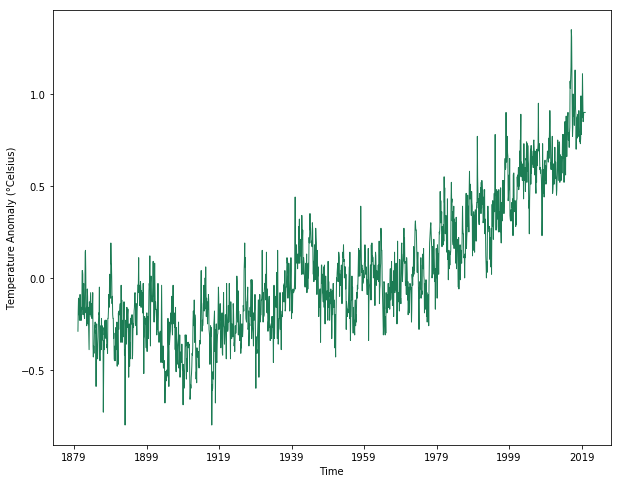

In [23]:
plt.figure(figsize=(10,8))
plt.xlabel('Time')
plt.ylabel('Temperature Anomaly (°Celsius)')
plt.plot(t, color='#1C7C54', linewidth=1.0)

### Resampling Data

Sometimes data are too granular to visualize nicely. The `resample` function can change the frequency from months to years.

Downsample the temperature data into years, the string ‘A’ represents ‘calendar year-end’. 

`t.resample('A').mean().head()`

In [24]:
t.resample('A').mean().head()

,Avg_Anomaly_deg_C
date,
1880-12-31,-0.187500
1881-12-31,-0.100833
1882-12-31,-0.110000
1883-12-31,-0.191667
1884-12-31,-0.294167


#### Plot the Resampled Data

`plt.figure(figsize=(10,8))`

`plt.xlabel("Time")`

`plt.ylabel("Temperature Anomaly (°Celsius)")`

`plt.plot(t.resample("A").mean(), color="#1C7C54", linewidth=1.0)`


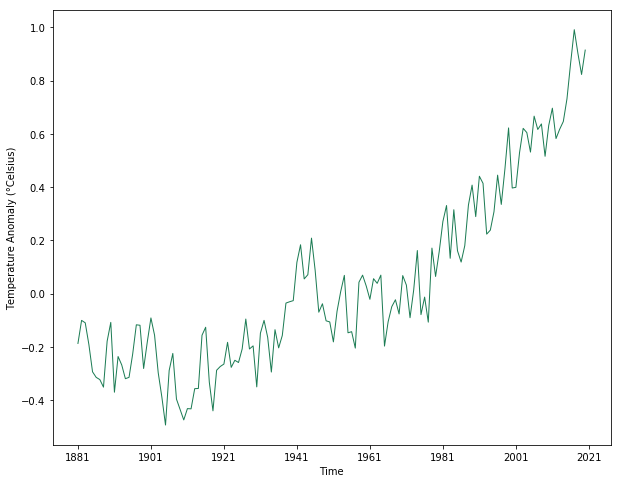

In [25]:
plt.figure(figsize=(10, 8))
plt.xlabel("Time")
plt.ylabel("Temperature Anomaly (°Celsius)")
plt.plot(t.resample("A").mean(), color="#1C7C54", linewidth=1.0)

### Wrangling CO2 Data

* Slicing and Searching

* Useful functions

Select only the row representing the CO₂ emissions for the entire world. Create a new dataframe that uses a DateTime index — and then use the raw data to populate it.

In [26]:
raw_e.tail()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
259,Kosovo,XKX,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260,"Yemen, Rep.",YEM,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.683679,0.494324,0.71013,0.525293,0.644143,0.686312,...,0.826044,0.762823,1.013900,0.878996,NaN,NaN,NaN,NaN,NaN,NaN
261,South Africa,ZAF,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,5.727221,5.832621,5.88717,5.961336,6.332342,6.616544,...,9.048936,8.872523,8.686590,8.979062,NaN,NaN,NaN,NaN,NaN,NaN
262,Zambia,ZMB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,0.946606,1.096876,...,0.209458,0.253506,0.265078,0.292412,NaN,NaN,NaN,NaN,NaN,NaN
263,Zimbabwe,ZWE,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,1.034903,1.166242,...,0.741686,0.594152,0.874563,0.884721,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# Define function to pull value from raw data, using DateIndex from new DataFrame row
def populate_df(row):
    index = str(row['date'].year)
    value = raw_e_world.loc[index]
    return value
  
# Select just the row with co2 emissions for the 'world', and the columns for the years 1960-2018 
raw_e_world = raw_e[raw_e['Country Name']=='World'].loc[:,'1960':'2018']
#print (raw_e_world)

# 'Traspose' the resulting slice, making the columns become rows and vice versa
raw_e_world = raw_e_world.T
#print (raw_e_world)
raw_e_world.columns = ['value']

# Create a new DataFrame with a daterange the same the range for.
# the Temperature data (after resampling to years)
date_rng = pd.date_range(start='31/12/1960', end='31/12/2018', freq='y')
e = pd.DataFrame(date_rng, columns=['date'])

# Populate the new DataFrame using the values from the raw data slice
v = e.apply(lambda row: populate_df(row), axis=1)
e['Global CO2 Emissions per Capita'] = v
e.set_index('date', inplace=True)
e.head()


,Global CO2 Emissions per Capita
date,
1960-12-31,3.099157
1961-12-31,3.070018
1962-12-31,3.140957
1963-12-31,3.245109
1964-12-31,3.361380


Select all data after the year 2011:

`e[e.index.year>2011]`

In [28]:
e[e.index.year>2011]

,Global CO2 Emissions per Capita
date,
2012-12-31,5.005069
2013-12-31,4.997599
2014-12-31,4.980707
2015-12-31,NaN
2016-12-31,NaN
2017-12-31,NaN
2018-12-31,NaN


Fill NaN vales using forward fill

`e.fillna(method='ffill', inplace=True)`

`e[e.index.year>2011]`

In [29]:
e.fillna(method='ffill', inplace=True)
e[e.index.year>2011]

,Global CO2 Emissions per Capita
date,
2012-12-31,5.005069
2013-12-31,4.997599
2014-12-31,4.980707
2015-12-31,4.980707
2016-12-31,4.980707
2017-12-31,4.980707
2018-12-31,4.980707


Use the DateTime index to search on a range

`e['1984-01-04':'1990-01-06']`

In [30]:
e['1984-01-04':'1990-01-06']

,Global CO2 Emissions per Capita
date,
1984-12-31,4.024779
1985-12-31,4.074093
1986-12-31,4.124274
1987-12-31,4.152156
1988-12-31,4.226610
1989-12-31,4.243794


#### Plotting the Temperature Data

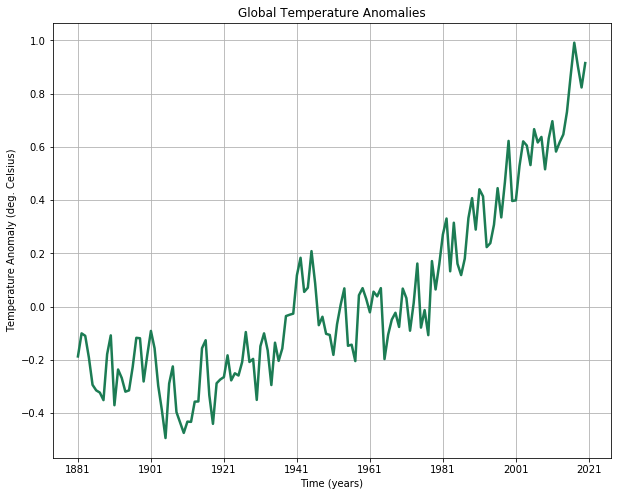

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

t_resampled = t.resample('A').mean()

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(t_resampled, color='#1C7C54', linewidth=2.5)
ax.set(xlabel="Time (years)", ylabel="Temperature Anomaly (deg. Celsius)", title="Global Temperature Anomalies")
ax.grid()

#### Plot the CO2 Data

Create figures and axes

`fig, ax = plt.subplots(figsize=(10,8))`

Plot co2 emissions data with specific colour and line thickness

`ax.plot(e, color='#3393FF', linewidth=2.5)`

Set axis labels and graph title

`ax.set(xlabel="Time (years)", ylabel="Emissions (Metric Tons per Capita)", title="Global CO2 Emission over Time")`

Enable grid

`ax.grid()`

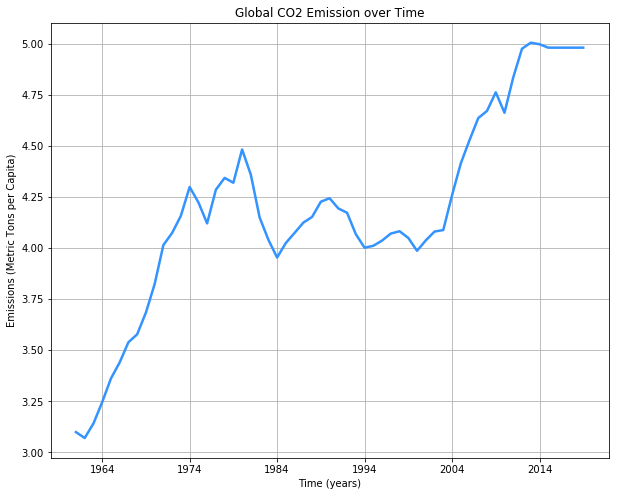

In [32]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(e, color="#3393FF", linewidth=2.5)
ax.set(xlabel='Time (years)', ylabel="Emissions (Metric Tons per Capita)",title="Global CO2 Emission over Time")

ax.grid()

#### Creating Interactive Plots

In [33]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

In [34]:
t.resample('A').mean().iplot(kind='line', xTitle='Time (years)', color='#1C7C54',
                  yTitle='Temperature Anomaly (deg. Celsius)', title='Global Temperature Anomalies')

In [35]:
e.iplot(kind='line', xTitle='Time (years)', color='#3393FF',
                  yTitle='Emissions (Metric Tons per Capita)', title='Global CO2 Emission over Time')

In [36]:
%whos

Variable              Type             Data/Info
------------------------------------------------
ZipFile               type             <class 'zipfile.ZipFile'>
ax                    AxesSubplot      Axes(0.125,0.125;0.775x0.755)
calendar              module           <module 'calendar' from '<...>b/python3.6/calendar.py'>
clean_anomaly_value   function         <function clean_anomaly_value at 0x11b0be510>
cufflinks             module           <module 'cufflinks' from <...>s/cufflinks/__init__.py'>
date_rng              DatetimeIndex    DatetimeIndex(['1960-12-3<...>ime64[ns]', freq='A-DEC')
datetime              type             <class 'datetime.datetime'>
e                     DataFrame                    Global CO2 Em<...>                 4.980707
fig                   Figure           Figure(720x576)
go                    module           <module 'plotly.graph_obj<...>/graph_objs/__init__.py'>
init_notebook_mode    function         <function init_notebook_mode at 0x11fbd8ea0>
ip